In [3]:
import numpy as np
from numpy.fft import ifft
import matplotlib.pyplot as plt

In [25]:
def f(x): # define function to be approximated
    y = abs(x)
    return y

def zj(x): # transform interval [0,2] to [-pi,pi]
    zj =np.pi*(x-1/8) 
    return zj

In [26]:
# Using fft to compute the coefficients of the polynomial
x = np.array([-np.pi,-3/4*np.pi,-1/2*np.pi,-1/4*np.pi,0,1/4*np.pi,np.pi/2,3/4*np.pi])
y = f(x)
ck = ifft(y)
y

array([3.14159265, 2.35619449, 1.57079633, 0.78539816, 0.        ,
       0.78539816, 1.57079633, 2.35619449])

In [27]:
y*np.cos(2*x)

array([ 3.14159265e+00, -4.32825906e-16, -1.57079633e+00,  4.80917673e-17,
        0.00000000e+00,  4.80917673e-17, -1.57079633e+00, -4.32825906e-16])

In [33]:
sum(y*np.cos(4*x))/4

0.0

In [36]:
sum(y*np.sin(1*x))/4

-1.1102230246251565e-16

In [6]:
print('ck:',ck)


ck: [1.57079633+0.j 0.67037927+0.j 0.        +0.j 0.1150189 +0.j
 0.        +0.j 0.1150189 +0.j 0.        +0.j 0.67037927+0.j]


In [7]:
# a - real part
# b - imaginary part
ak = ck.real*2
bk = ck.imag*2

In [8]:
print('ak:',ak) 
print('bk:',bk)

ak: [3.14159265 1.34075853 0.         0.2300378  0.         0.2300378
 0.         1.34075853]
bk: [0. 0. 0. 0. 0. 0. 0. 0.]


In [517]:
# Constructing S4: The trigonometric interpolating polynomial degree 4 (S4) 
poly_x = np.arange(0,2,0.01)
S4 = ak[0]/2 + ak[1]*np.cos(1*zj(poly_x)) + ak[2]*np.cos(2*zj(poly_x)) + ak[3]*np.cos(3*zj(poly_x)) \
        + bk[1]*np.sin(1*zj(poly_x)) + bk[2]*np.sin(2*zj(poly_x)) + bk[3]*np.sin(3*zj(poly_x)) \
        + ak[4]/2*np.cos(4*zj(poly_x))

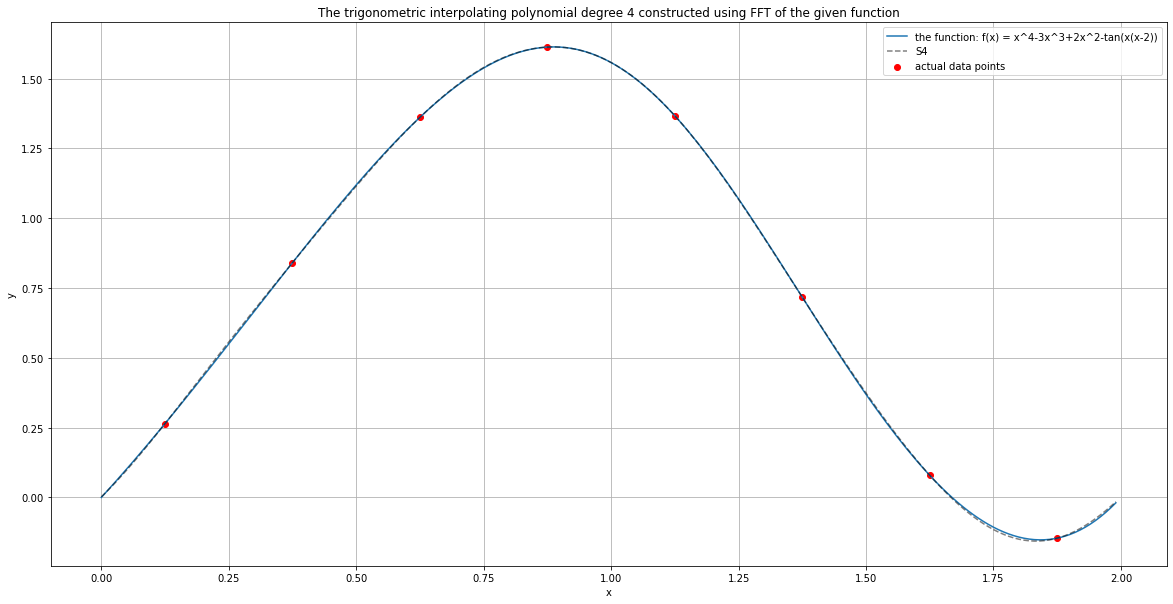

In [518]:
# Plotting the polynomial vs the real data points
plt.figure(figsize=(20, 10))
plt.scatter(x,y,color='red', label='actual data points')
plt.plot(np.arange(0,2,0.01),f(np.arange(0,2,0.01)),label='the function: f(x) = x^4-3x^3+2x^2-tan(x(x-2))')
plt.plot(np.arange(0,2,0.01), S4, '--', label='S4',color='black',alpha=0.5)
plt.title('The trigonometric interpolating polynomial degree 4 constructed using FFT of the given function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

code reference: https://www.mathworks.com/help/matlab/math/polynomial-interpolation-using-fft.html